# Avant de commencer, veuillez installer les packages nécessaires via le code suivant :
*pip install -r requirements.txt*

*pip install pandas numpy matplotlib seaborn scikit-learn*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import r2_score


# Chargement des données (provenant du csv)

In [2]:
df = pd.read_csv("airbnb_data.csv")

# print("le fichier contient", df.shape[0], "lignes et", df.shape[1], "colonnes")
df 

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20241206031559,2024-12-07,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,t,1,1,0,0,0.05
1,5396,https://www.airbnb.com/rooms/5396,20241206031559,2024-12-09,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.85,4.96,4.59,7510402838018,f,1,1,0,0,2.26
2,7397,https://www.airbnb.com/rooms/7397,20241206031559,2024-12-08,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,4.89,4.94,4.74,7510400829623,f,2,2,0,0,2.20
3,7964,https://www.airbnb.com/rooms/7964,20241206031559,2024-12-09,previous scrape,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22155,...,5.00,5.00,5.00,7510903576564,f,1,1,0,0,0.03
4,9359,https://www.airbnb.com/rooms/9359,20241206031559,2024-12-09,city scrape,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,https://a0.muscache.com/pictures/c2965945-061f...,28422,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91026,1304562779094087796,https://www.airbnb.com/rooms/1304562779094087796,20241206031559,2024-12-06,city scrape,Studio ensoleillé sur Canal,"Sunny studio on Canal de l 'Ourcq, metro Laumi...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,38574929,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",t,1,1,0,0,NaN
91027,1304667478167694444,https://www.airbnb.com/rooms/1304667478167694444,20241206031559,2024-12-07,city scrape,Studio bohémien,Enjoy a Parisian life in this studio facing th...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,595527331,...,NaN,NaN,NaN,7512014848156,f,1,1,0,0,NaN
91028,1305050902233494632,https://www.airbnb.com/rooms/1305050902233494632,20241206031559,2024-12-08,city scrape,Cozy Apartment - Marais - Pelee,Just steps from the vibrant Place de la Bastil...,The apartment is located in one of the most li...,https://a0.muscache.com/pictures/prohost-api/H...,156775524,...,NaN,NaN,NaN,7511114844445,t,107,107,0,0,NaN
91029,1305061192394005038,https://www.airbnb.com/rooms/1305061192394005038,20241206031559,2024-12-07,city scrape,Cozy Apartment - Tour Eiffel - Finlay,Located in a prestigious area just a few minut...,This apartment is ideally located in a prestig...,https://a0.muscache.com/pictures/prohost-api/H...,156775524,...,NaN,NaN,NaN,7511514844533,t,107,107,0,0,NaN


In [3]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
df.beds.isnull().sum()

31087

In [5]:
df.isnull().mean().sort_values(ascending = False)

neighbourhood_group_cleansed    1.000000
calendar_updated                1.000000
host_neighbourhood              0.646615
host_about                      0.565225
neighborhood_overview           0.495820
                                  ...   
latitude                        0.000000
availability_30                 0.000000
availability_60                 0.000000
availability_90                 0.000000
id                              0.000000
Length: 75, dtype: float64

In [6]:
df[['neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed']].isnull().sum()
# neighbourhood_cleansed à aucune valeurs manquantes, nous pouvons alors le garder lors de l'analyse de données

neighbourhood                   45135
neighbourhood_cleansed              0
neighbourhood_group_cleansed    91031
dtype: int64

In [7]:
df.beds.mean()

1.7859835846790337

In [8]:
df.property_type.value_counts()

property_type
Entire rental unit              76168
Private room in rental unit      5839
Entire condo                     2526
Room in boutique hotel           1197
Room in hotel                    1135
                                ...  
Shared room in cabin                1
Dome                                1
Shared room in farm stay            1
Private room in earthen home        1
Private room in bungalow            1
Name: count, Length: 68, dtype: int64

In [9]:
df.beds.fillna(1, inplace = True)

/var/folders/vf/lmzv5gy530bbnf_1mtmqywbm0000gn/T/ipykernel_18150/4147998425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.beds.fillna(1, inplace = True)


# Sélection et nettoyage des données

In [10]:
df = df[['name', 'latitude', 'longitude', 'room_type', 'price',
         'minimum_nights', 'number_of_reviews', 'accommodates', 'bedrooms', 'beds',
         'review_scores_rating', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'reviews_per_month']]

df = df.drop_duplicates()
df = df.dropna()
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Analyse des prix et des nuits minimums (avec valeurs aberrantes)


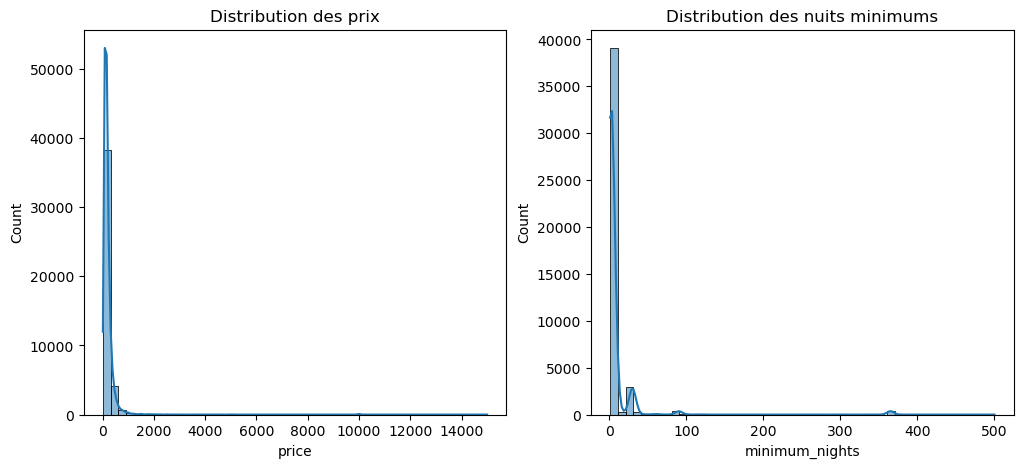

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution des prix")

plt.subplot(1,2,2)
sns.histplot(df['minimum_nights'], bins=50, kde=True)
plt.title("Distribution des nuits minimums")
plt.show()

# Analyse des prix dans tout paris

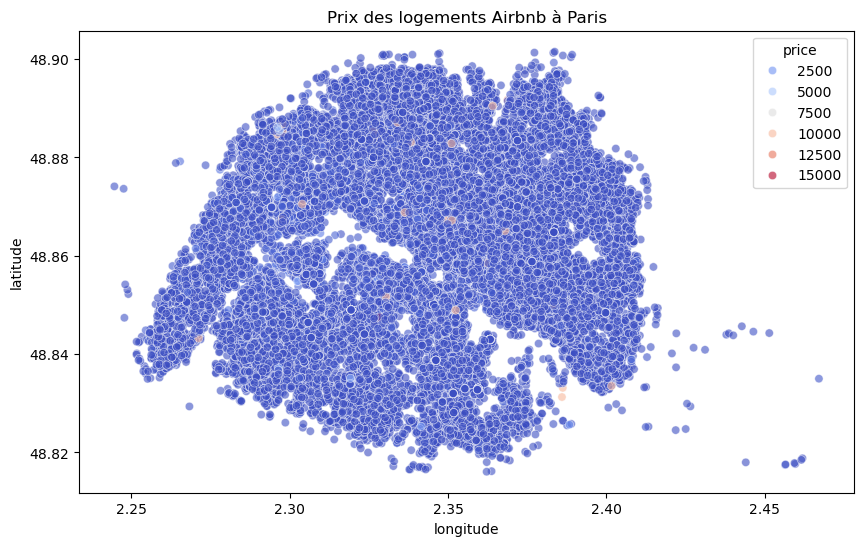

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price', palette="coolwarm", alpha=0.6)
plt.title("Prix des logements Airbnb à Paris")
plt.show()

# Analyse des prix par arrondissement

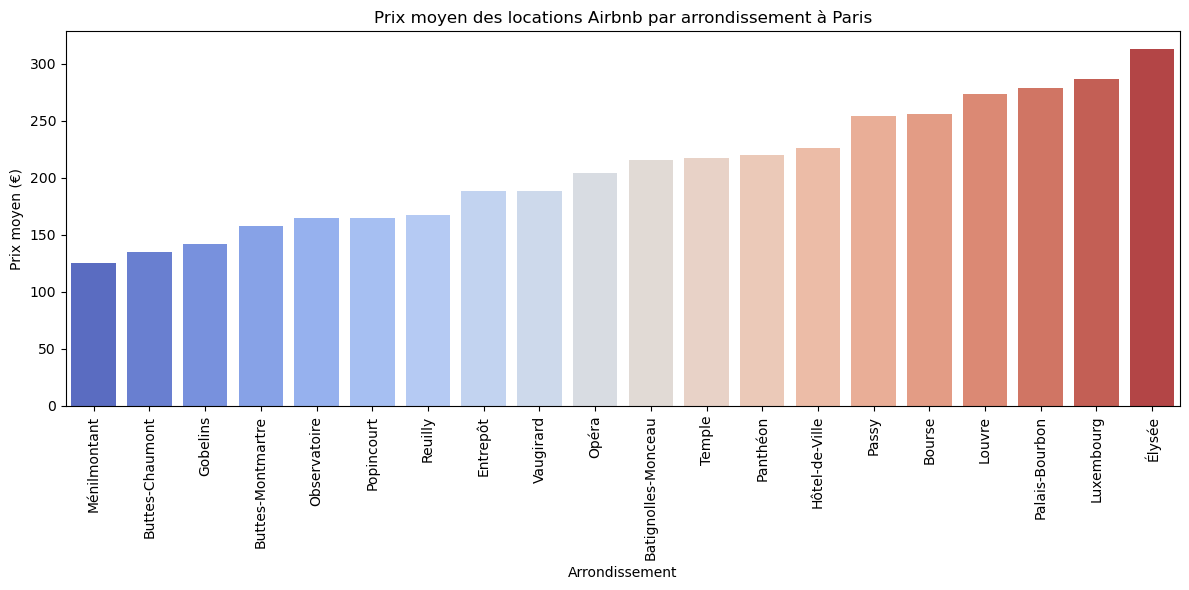

In [13]:
plt.figure(figsize=(12,6))
arrondissement_price = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values()
sns.barplot(x=arrondissement_price.index, y=arrondissement_price.values, hue=arrondissement_price.index, palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.xlabel("Arrondissement")
plt.ylabel("Prix moyen (€)")
plt.title("Prix moyen des locations Airbnb par arrondissement à Paris")
plt.tight_layout() 
plt.show()

# Analyse des prix moyens par type de propriété


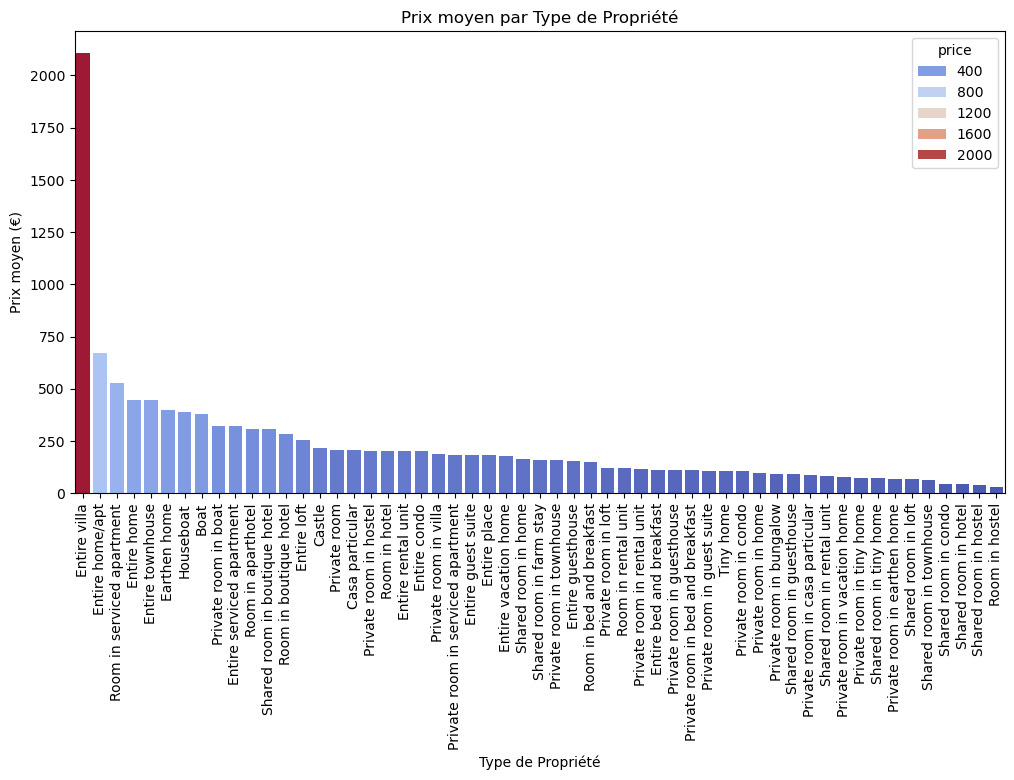

In [14]:
prix_par_type = df.groupby('property_type')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=prix_par_type.index, y=prix_par_type.values, hue=prix_par_type, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Type de Propriété")
plt.ylabel("Prix moyen (€)")
plt.title("Prix moyen par Type de Propriété")
plt.show()

Nombre de valeurs aberrantes pour 'price' : 3274
Nombre de données aberrantes supprimés : 3274


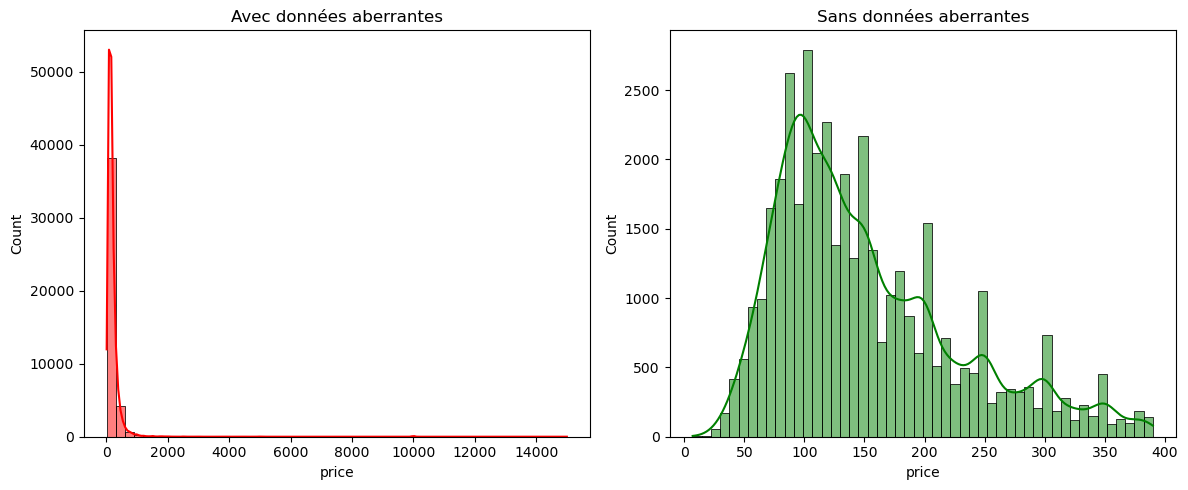

In [15]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dt_aber = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Nombre de valeurs aberrantes pour 'price' : {dt_aber.shape[0]}")
# print(dt_aber[['name', 'price']])

# suppression valeurs aberrantes
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

dt_aber_count = len(df) - len(df_clean)
print(f"Nombre de données aberrantes supprimés : {dt_aber_count}")

# ava,nt après
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color='red')
plt.title("Avec données aberrantes")

plt.subplot(1, 2, 2)
sns.histplot(df_clean['price'], bins=50, kde=True, color='green')
plt.title("Sans données aberrantes")

plt.tight_layout()
plt.show()

# Régression Linéaire Simple

Coefficient de détermination R² : 0.272


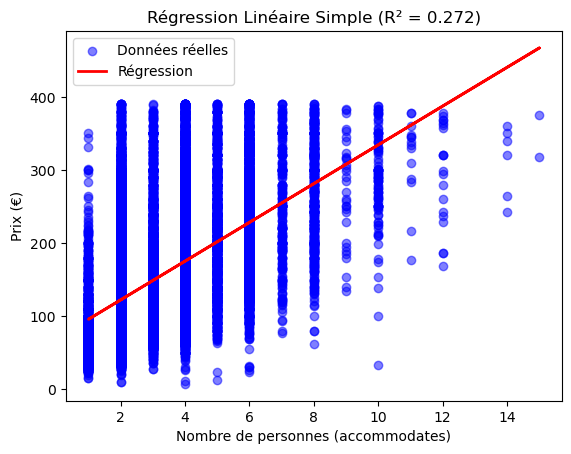

In [16]:
X = df_clean[['accommodates']]
y = df_clean['price']

model_simple = LinearRegression()
model_simple.fit(X, y)

# predictio
y_pred = model_simple.predict(X)

# coef en R²
r2 = r2_score(y, y_pred)
print(f"Coefficient de détermination R² : {r2:.3f}")

plt.scatter(X, y, color='blue', alpha=0.5, label='Données réelles')
plt.plot(X, y_pred, color='red', linewidth=2, label='Régression')
plt.xlabel("Nombre de personnes (accommodates)")
plt.ylabel("Prix (€)")
plt.title(f"Régression Linéaire Simple (R² = {r2:.3f})")
plt.legend()
plt.show()

Coefficient de détermination R² : -6867183910795221248507904.000


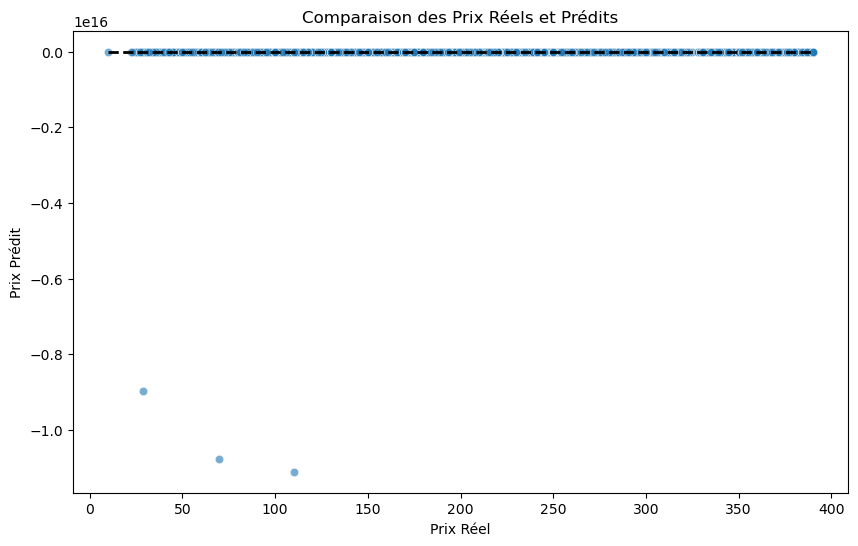

In [17]:
df = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]

# conversion
df = pd.get_dummies(df, columns=['room_type', 'host_is_superhost', 'property_type'], drop_first=True)

# pertinents à prendre : nombre de pers, nombre chambres, nombre  lits, note avis etc
features = ['accommodates', 'bedrooms', 'beds', 'review_scores_rating', 
            'number_of_reviews', 'minimum_nights', 'latitude', 'longitude'] + \
           [col for col in df.columns if col.startswith('room_type_') or 
            col.startswith('host_is_superhost_') or col.startswith('property_type_')]

X = df[features]
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# coef en R²
r2 = r2_score(y_test, y_pred)
print(f"Coefficient de détermination R² : {r2:.3f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Prix Réel')
plt.ylabel('Prix Prédit')
plt.title('Comparaison des Prix Réels et Prédits')
plt.show()

# Régression Linéaire Multiple

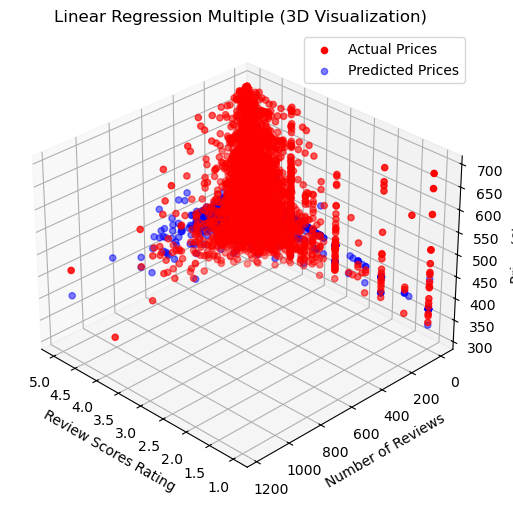

In [18]:
# Check if the required columns exist in the DataFrame
required_columns = ['review_scores_rating', 'price', 'number_of_reviews'] + \
                   [col for col in df.columns if col.startswith('room_type_')]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Clean the 'price' column by removing the dollar sign and converting to float
    df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

    # Proceed with one-hot encoding for room type if it's not already encoded
    if 'room_type' in df.columns:
        df = pd.get_dummies(df, columns=['room_type'], drop_first=True)  # One-hot encoding room_type

    # Proceed with dropping rows with missing values
    df_clean = df.dropna(subset=required_columns)

    # Splitting the dataset into training and testing sets
    X = df_clean[['review_scores_rating', 'number_of_reviews'] + 
                 [col for col in df_clean.columns if col.startswith("room_type_")]]  # Using one-hot encoded room types
    y = df_clean['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 3D Visualization of Actual vs Predicted Prices
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot of actual prices
    ax.scatter(X_test['review_scores_rating'], X_test['number_of_reviews'], y_test +300 , color='red', label='Actual Prices')

    # Scatter plot of predicted prices
    y_pred = model.predict(X_test)
    ax.scatter(X_test['review_scores_rating'], X_test['number_of_reviews'], y_pred  + 300, color='blue', alpha=0.5, label='Predicted Prices')

    ax.view_init(elev=30, azim=135)

    # Labels
    ax.set_xlabel("Review Scores Rating")
    ax.set_ylabel("Number of Reviews")
    ax.set_zlabel("Price (€)")
    ax.set_title("Linear Regression Multiple (3D Visualization)")

    plt.legend()
    plt.show()


# Matrice des caracteridtiques numérique Airbnb 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn pour le machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

def charger_donnees(chemin_fichier):
    """
    Charge les données Airbnb à partir d'un fichier CSV
    """
    try:
        # Utilisation de plusieurs encodages possibles
        encodages = ['utf-8', 'latin-1', 'iso-8859-1']
        
        for encodage in encodages:
            try:
                df = pd.read_csv(airbnb_data.csv, encoding=encodage)
                print(f"Données chargées avec succès. Nombre de lignes : {len(df)}")
                return df
            except UnicodeDecodeError:
                continue
        
        print("Impossible de charger le fichier avec les encodages standards.")
        return None
    
    except FileNotFoundError:
        print(f"Erreur : Le fichier {chemin_fichier} n'a pas été trouvé.")
        return None

def nettoyer_donnees(df):
    """
    Nettoie et prépare les données pour l'analyse
    """
    # Vérification des colonnes requises
    colonnes_requises = ['price', 'review_scores_rating', 'number_of_reviews', 
                          'accommodates', 'bedrooms', 'beds', 'minimum_nights', 
                          'room_type', 'neighbourhood_cleansed', 'property_type']
    
    colonnes_manquantes = [col for col in colonnes_requises if col not in df.columns]
    if colonnes_manquantes:
        print(f"Colonnes manquantes : {colonnes_manquantes}")
        return None
    
    # Nettoyage du prix
    df['price'] = df['price'].replace(r'[\$,]', '', regex=True)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    
    # Supprimer les lignes avec des prix NaN
    df = df.dropna(subset=['price'])
    
    # Gestion des valeurs manquantes
    colonnes_numeriques = ['review_scores_rating', 'number_of_reviews', 
                            'accommodates', 'bedrooms', 'beds', 'minimum_nights']
    
    for colonne in colonnes_numeriques:
        df[colonne] = pd.to_numeric(df[colonne], errors='coerce')
        df[colonne] = df[colonne].fillna(df[colonne].median())
    
    # Conversion des colonnes booléennes
    bool_columns = ['host_is_superhost']
    for col in bool_columns:
        if col in df.columns:
            df[col] = df[col].map({'t': 1, 'f': 0}).fillna(0)
    
    return df

def analyser_statistiques_descriptives(df):
    """
    Génère des statistiques descriptives et des visualisations
    """
    # Statistiques de base
    print("\n--- Statistiques Descriptives des Prix ---")
    print(df['price'].describe())
    
    # Distribution des prix
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    df['price'].hist(bins=50)
    plt.title('Distribution des Prix')
    plt.xlabel('Prix')
    plt.ylabel('Fréquence')
    
    # Boîte à moustaches des prix
    plt.subplot(1, 2, 2)
    df.boxplot(column=['price'])
    plt.title('Boîte à Moustaches des Prix')
    plt.tight_layout()
    plt.savefig('prix_distribution.png')
    plt.close()

def visualiser_correlations(df):
    """
    Génère une heatmap des corrélations
    """
    # Sélection des colonnes numériques
    colonnes_numeriques = ['price', 'review_scores_rating', 'number_of_reviews', 
                            'accommodates', 'bedrooms', 'beds', 'minimum_nights']
    
    # Matrice de corrélation
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[colonnes_numeriques].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matrice de Corrélation des Caractéristiques Airbnb')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png')
    plt.close()

def preparer_donnees_model(df):
    """
    Prépare les données pour la modélisation
    """
    # Sélection des features
    features_numeriques = [
        'review_scores_rating', 
        'number_of_reviews', 
        'accommodates', 
        'bedrooms', 
        'beds', 
        'minimum_nights'
    ]
    
    features_categoriques = [
        'room_type', 
        'neighbourhood_cleansed', 
        'property_type'
    ]
    
    # Ajout conditionnel de host_is_superhost
    if 'host_is_superhost' in df.columns:
        features_categoriques.append('host_is_superhost')
    
    # Préparation des données
    X_numeriques = df[features_numeriques]
    X_categoriques = df[features_categoriques]
    y = df['price']
    
    return X_numeriques, X_categoriques, y

def entrainer_modeles(X_numeriques, X_categoriques, y):
    """
    Entraîne et évalue différents modèles de régression
    """
    # Préprocesseur pour les données
    preprocesseur = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), X_numeriques.columns),
            ('cat', OneHotEncoder(handle_unknown='ignore'), X_categoriques.columns)
        ])
    
    # Combinaison des features
    X = pd.concat([X_numeriques, X_categoriques], axis=1)
    
    # Division des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Définition des modèles
    modeles = {
        'Régression Linéaire Baseline': make_pipeline(preprocesseur, LinearRegression()),
        'Régression Ridge': make_pipeline(preprocesseur, Ridge(alpha=1.0)),
        'Régression Lasso': make_pipeline(preprocesseur, Lasso(alpha=0.1)),
        'Régression Polynomiale': make_pipeline(
            preprocesseur, 
            PolynomialFeatures(degree=2),
            LinearRegression()
        )
    }
    
    # Évaluation des modèles
    resultats = {}
    for nom, modele in modeles.items():
        # Entraînement
        modele.fit(X_train, y_train)
        
        # Prédiction
        y_pred = modele.predict(X_test)
        
        # Métriques
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Validation croisée
        scores_cv = cross_val_score(modele, X_train, y_train, cv=5, scoring='r2')
        
        resultats[nom] = {
            'R² Score': r2,
            'Erreur Quadratique Moyenne': mse,
            'Erreur Absolue Moyenne': mae,
            'R² Cross-Validation': scores_cv.mean()
        }
        
        # Affichage des résultats
        print(f"\n{nom}:")
        print(f"Coefficient de détermination R² : {r2:.3f}")
        print(f"Erreur Quadratique Moyenne : {mse:.2f}")
        print(f"Erreur Absolue Moyenne : {mae:.2f}")
        print(f"R² Cross-Validation : {scores_cv.mean():.3f}")
    
    return resultats

def analyse_prix_par_quartier(df):
    """
    Analyse des prix moyens par quartier
    """
    prix_par_quartier = df.groupby('neighbourhood_cleansed')['price'].agg(['mean', 'median', 'count'])
    prix_par_quartier = prix_par_quartier.sort_values('mean', ascending=False)
    
    plt.figure(figsize=(15, 6))
    prix_par_quartier['mean'].plot(kind='bar')
    plt.title('Prix Moyens par Quartier')
    plt.xlabel('Quartier')
    plt.ylabel('Prix Moyen')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig('prix_par_quartier.png')
    plt.close()
    
    return prix_par_quartier

def main(chemin_fichier):
    """
    Fonction principale d'analyse
    """
    # Chargement des données
    df = charger_donnees(chemin_fichier)
    if df is None:
        return
    
    # Nettoyage des données
    df = nettoyer_donnees(df)
    if df is None:
        print("Impossible de nettoyer les données.")
        return
    
    # Analyse statistique
    analyser_statistiques_descriptives(df)
    
    # Visualisation des corrélations
    visualiser_correlations(df)
    
    # Analyse des prix par quartier
    prix_par_quartier = analyse_prix_par_quartier(df)
    print("\n--- Prix par Quartier ---")
    print(prix_par_quartier)
    
    # Préparation des données pour modélisation
    X_numeriques, X_categoriques, y = preparer_donnees_model(df)
    
    # Entraînement des modèles
    resultats_modeles = entrainer_modeles(X_numeriques, X_categoriques, y)
    
    return resultats_modeles

# Exemple d'utilisation
if __name__ == "__main__":
    # Remplacez 'airbnb_data.csv' par le chemin de votre fichier
    resultats = main('airbnb_data.csv')

Données chargées avec succès. Nombre de lignes : 91031

--- Statistiques Descriptives des Prix ---
count    60093.000000
mean       252.590485
std        594.242875
min          7.000000
25%        100.000000
50%        150.000000
75%        250.000000
max      30400.000000
Name: price, dtype: float64

--- Prix par Quartier ---
                              mean  median  count
neighbourhood_cleansed                           
Élysée                  400.919013   226.0   2309
Passy                   371.884517   190.0   4295
Palais-Bourbon          350.681380   200.0   1971
Luxembourg              327.394589   199.0   1959
Louvre                  323.144845   205.0   1581
Hôtel-de-Ville          314.685039   183.0   2032
Bourse                  271.497105   172.0   2418
Batignolles-Monceau     268.526671   150.0   4143
Opéra                   254.229444   174.0   3077
Temple                  251.371289   180.0   2863
Panthéon                244.214069   170.0   1976
Vaugirard           

ValueError: Input y contains NaN.